In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set(font_scale=1.35)


data = pd.read_csv("test.csv")

In [2]:
data

,Unnamed: 0,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,...,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65,drafted
0,7654,Josh Noble,Weber St.,BSky,19,7.5,87.6,16.2,44.4,46.63,...,0.1053,0.4211,0.5263,0.4211,0.1053,0.0000,1.0000,Wing G,4.631430,0.0
1,7660,Jonathan Cruz,Quinnipiac,NEC,33,50.3,94.4,16.2,51.0,51.32,...,1.7879,2.7273,4.5152,0.6667,0.3939,0.2727,5.2727,PF/C,0.174285,0.0
2,7662,Josh Sparks,Jacksonville,ASun,12,4.8,76.1,16.5,33.3,46.88,...,0.2500,0.5000,0.7500,0.3333,0.3333,0.3333,1.0000,C,0.000000,0.0
3,7667,William Graves,North Carolina,ACC,36,58.6,112.6,17.8,48.2,51.39,...,1.5278,3.1111,4.6389,0.9722,0.6389,0.1944,9.8056,Wing F,12.396500,0.0
4,7675,Eric Dearden,Utah Valley,GWC,26,48.9,84.0,19.2,42.9,47.74,...,0.1538,1.1923,1.3462,1.3462,1.0000,0.0000,5.3077,Combo G,4.449590,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21978,57607,Uros Plavsic,Tennessee,SEC,16,6.7,108.5,17.1,46.7,45.57,...,0.6250,0.4375,1.0625,0.3125,0.0625,0.1875,1.1250,C,0.000000,0.0
21979,57608,Lamar Norman Jr.,Duquesne,A10,4,13.1,84.9,14.1,32.7,36.46,...,0.5000,1.0000,1.5000,0.7500,0.7500,0.0000,5.0000,Combo G,12.964400,0.0
21980,57609,Trace Ramsey,UC San Diego,BW,3,2.5,16.8,15.4,0.0,0.00,...,0.0000,0.5000,0.5000,0.1667,0.3333,0.1667,1.6667,PF/C,4.094210,0.0
21981,57595,Raymond Bethea Jr.,Hampton,BSth,19,31.6,97.0,15.3,43.8,49.91,...,0.6316,2.0000,2.6316,0.5789,0.7368,0.3158,4.2105,Wing G,4.145830,0.0


In [3]:
y = data.drafted
X = data.drop("drafted", axis = 1)

# Creating training and test data by 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 45, stratify = y)


In [5]:
#Proportion of 0s and 1s in train data
print("Proportion of 0s and 1s in train data\n", y_train.value_counts()/y_train.shape)

#Proportion of 0s and 1s in test data
print("Proportion of 0s and 1s in train data\n", y_test.value_counts()/y_test.shape)

Proportion of 0s and 1s in train data
 0.0    0.974903
1.0    0.025097
Name: drafted, dtype: float64
Proportion of 0s and 1s in train data
 0.0    0.974983
1.0    0.025017
Name: drafted, dtype: float64


In [4]:
#remaking the dataframe as one for now
training = pd.concat([X_train, y_train], axis=1)
predictors = list(training.columns)
#removing cols we don't need
    #did this by hand by looking at df
predictors.remove("Unnamed: 0")
predictors.remove("player_name")
predictors.remove("rimmade+rimmiss")
predictors.remove('midmade+midmiss')
predictors.remove('dunksmiss+dunksmade')
predictors.remove('Unnamed: 64')
predictors.remove('Unnamed: 65')
predictors.remove('drafted')
predictors.remove('ast/tov')
predictors.remove('team')
predictors.remove('num')
predictors.remove('rimmade')
predictors.remove('midmade')
predictors.remove('dunksmade')
predictors.remove('type')

#dropping cols in training
training = training.drop(columns = ["Unnamed: 0", "player_name","rimmade+rimmiss", 'midmade+midmiss','dunksmiss+dunksmade',
                                    'Unnamed: 64', 'Unnamed: 65', 'drafted', 'ast/tov', 'team', 'num', 'rimmade',
                                    'midmade','type'])


#making for-loop of predictors to make a string for the logit model
str_of_preds = "conf"

for i in range(len(predictors) - 1):
    str_of_preds = str_of_preds + "+" + predictors[i + 1]
    
str_of_preds

'conf+GP+Min_per+Ortg+usg+eFG+TS_per+ORB_per+DRB_per+AST_per+TO_per+FTM+FTA+FT_per+twoPM+twoPA+twoP_per+TPM+TPA+TP_per+blk_per+stl_per+ftr+yr+ht+porpag+adjoe+pfr+year+pid+drtg+adrtg+dporpag+stops+bpm+obpm+dbpm+gbpm+mp+ogbpm+dgbpm+oreb+dreb+treb+ast+stl+blk+pts'

In [9]:

train = pd.concat([training, y_train], axis=1)
sns.pairplot(train)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001E804023040> (for post_execute):


KeyboardInterrupt: 

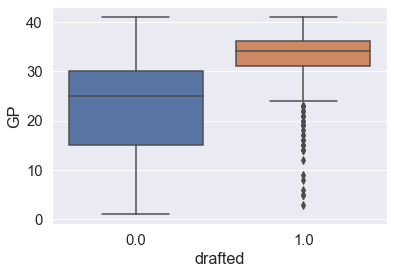

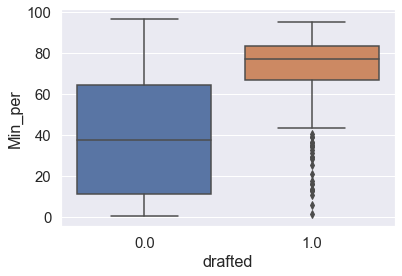

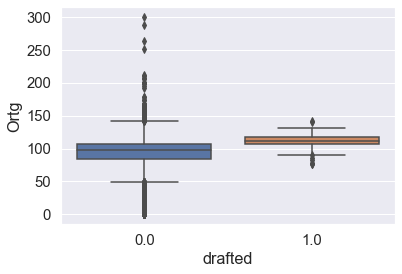

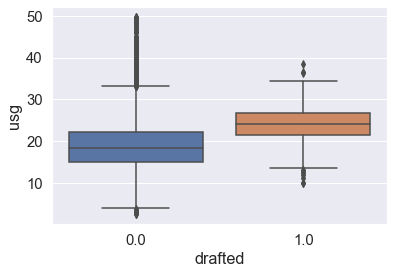

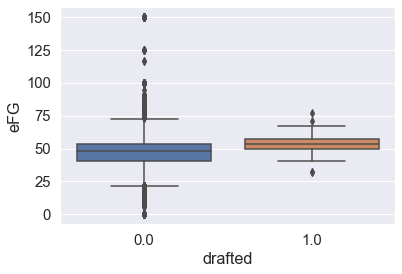

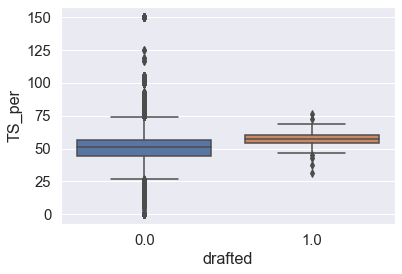

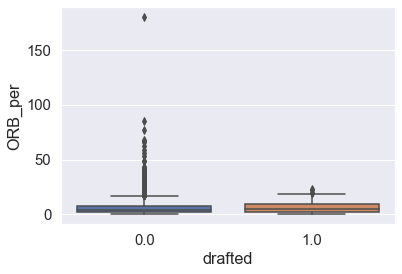

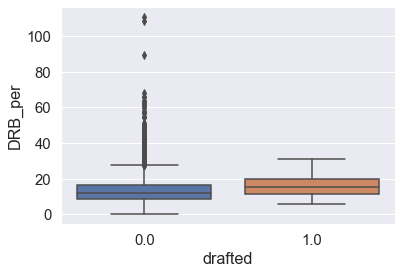

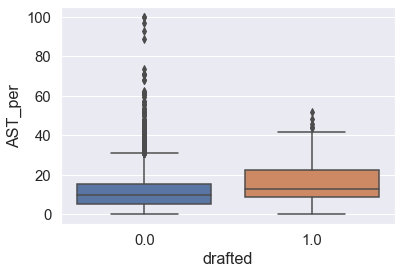

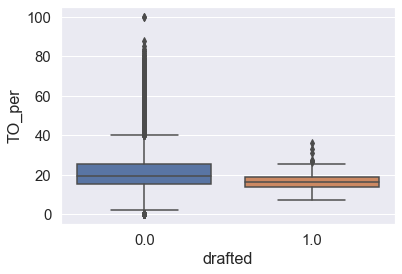

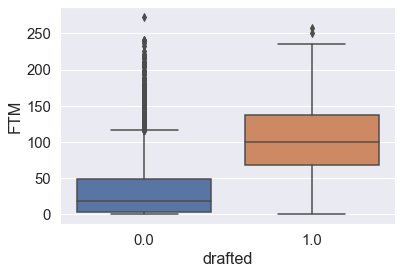

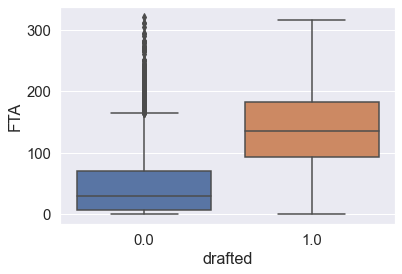

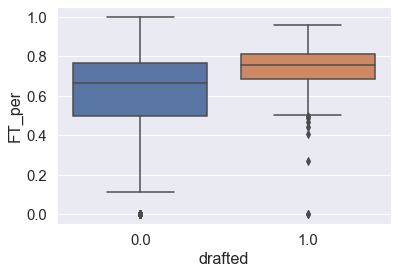

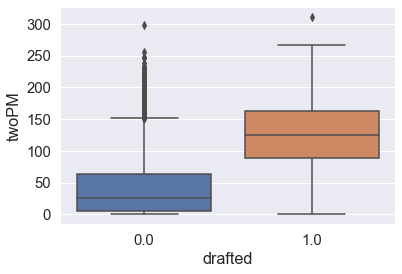

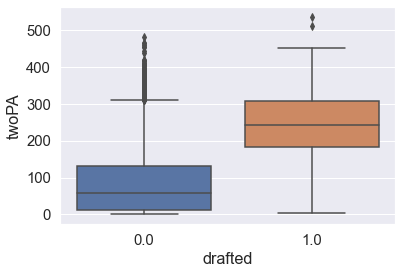

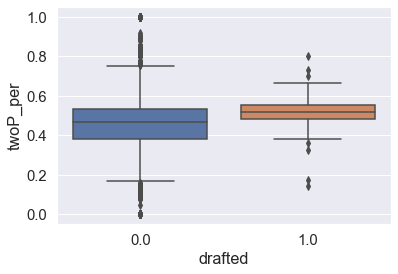

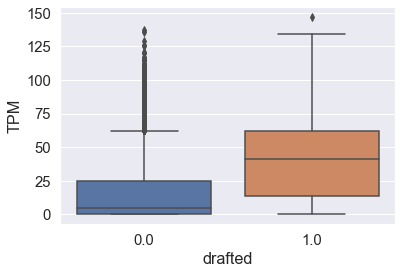

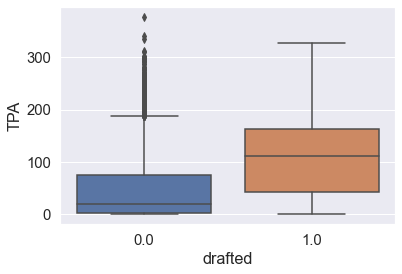

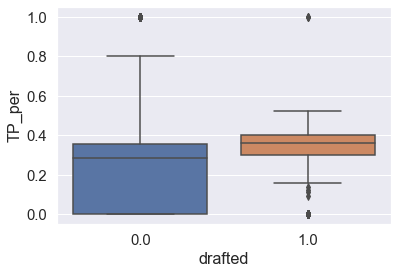

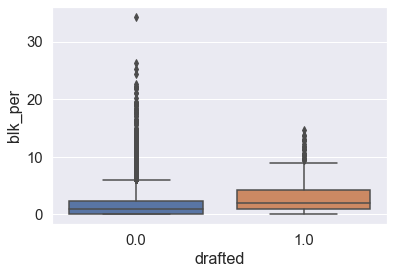

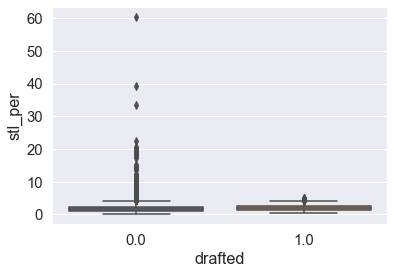

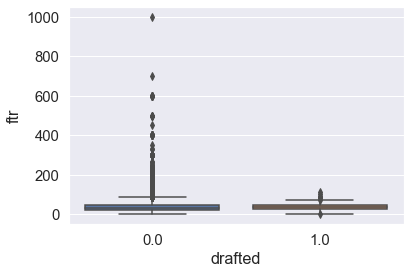

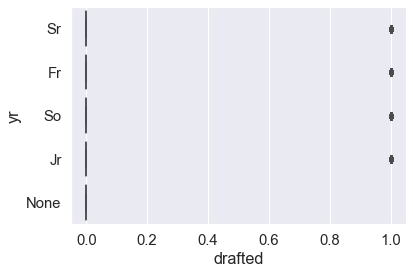

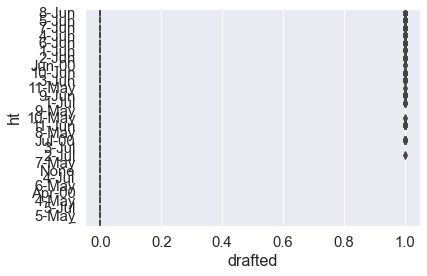

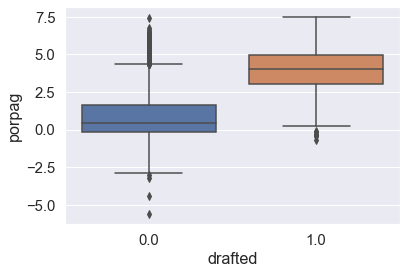

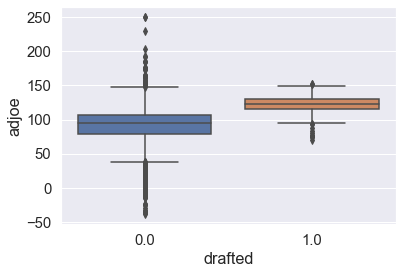

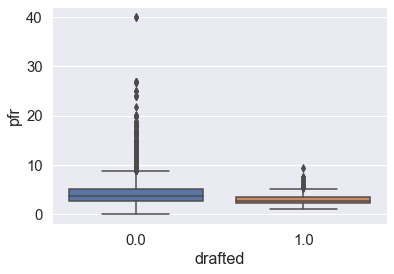

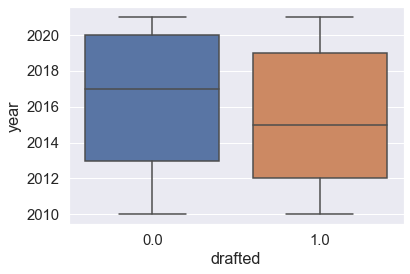

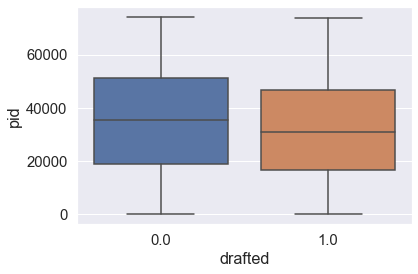

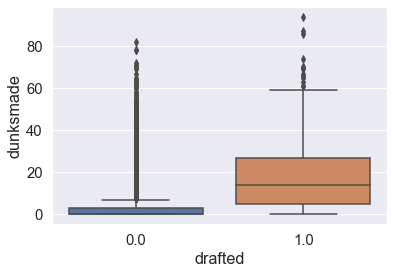

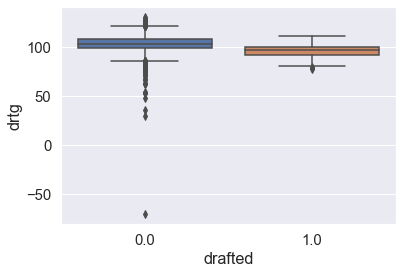

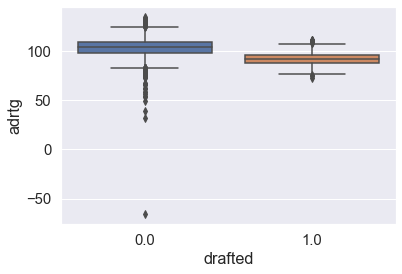

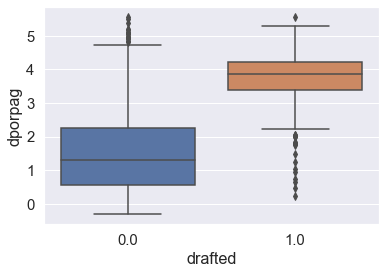

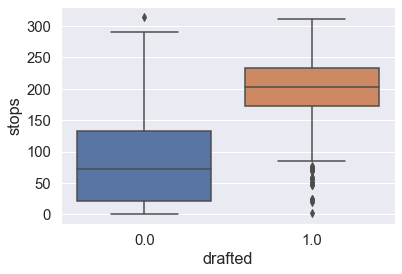

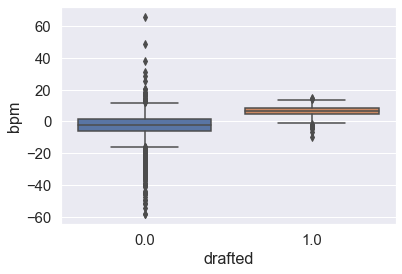

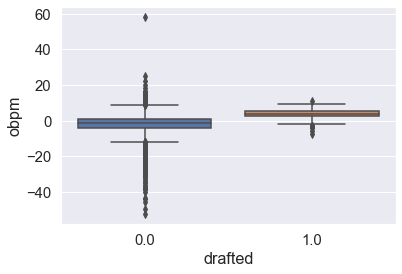

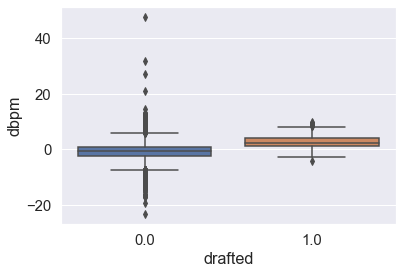

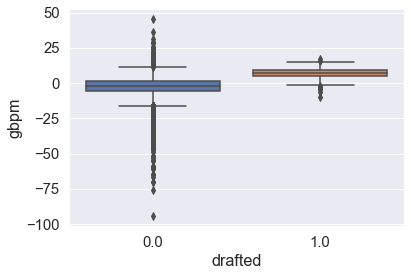

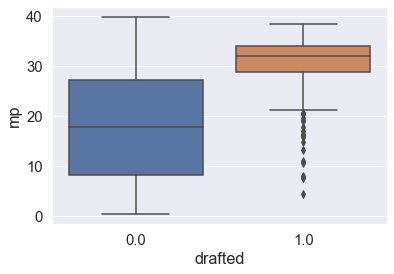

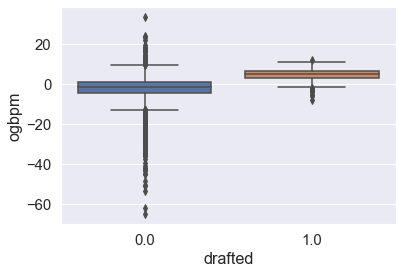

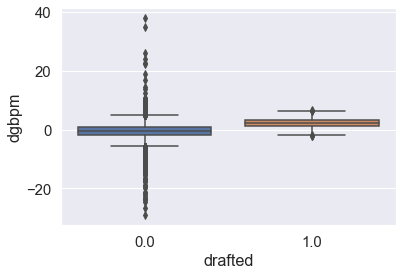

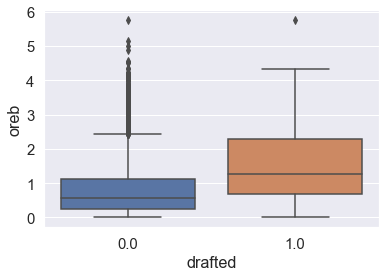

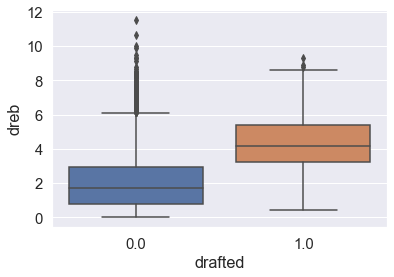

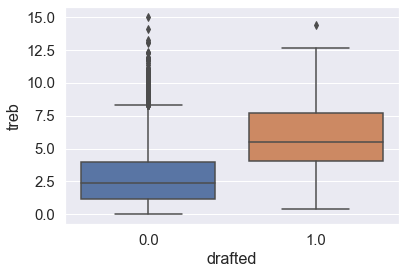

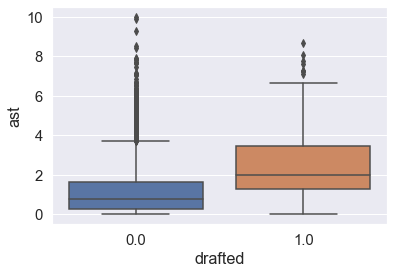

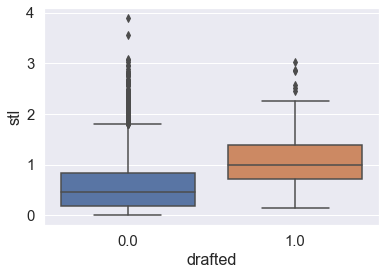

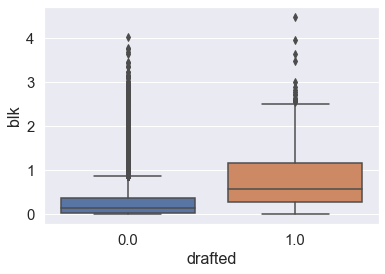

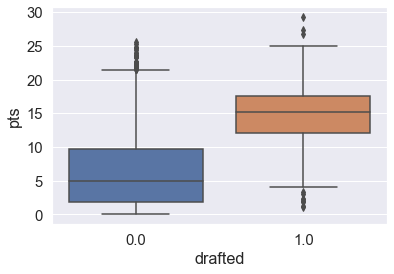

In [5]:
#eda of numeric vars
lst_num = list(training.columns)
lst_num.remove('conf')

train = pd.concat([training, y_train], axis=1)

for i in range(len(lst_num)):
    sns.boxplot(data = train, x = 'drafted', y = lst_num[i])
    plt.show()


In [61]:
training

,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,drafted
42019,Slnd,12,0.7,129.1,23.3,50.0,58.39,15.4,16.0,0.0,...,3.017970,6.224450,0.0625,0.1250,0.1875,0.0625,0.0625,0.0000,0.4375,0.0
47027,SB,31,60.4,86.3,23.3,39.1,44.37,9.0,18.7,10.4,...,-3.493030,-1.982040,2.0938,4.0938,6.1875,1.2812,0.4688,0.1875,8.6875,0.0
47852,MVC,22,66.9,110.0,13.6,62.5,65.42,3.7,15.5,1.8,...,-0.429655,0.365963,0.8333,3.7917,4.6250,0.3333,0.4167,0.2917,7.3750,0.0
25311,MAC,29,72.6,102.0,14.8,50.2,52.81,2.0,7.2,8.4,...,-1.015130,-1.394700,0.5172,1.9655,2.4828,1.2759,0.4138,0.3448,8.1034,0.0
3627,MAAC,6,1.0,104.5,24.2,50.0,54.47,0.0,15.9,13.3,...,-4.708650,0.281618,0.0000,0.3333,0.3333,0.1667,0.0000,0.0000,1.1667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22781,BSky,28,41.8,93.2,12.9,46.8,47.51,8.3,9.5,3.0,...,-4.424570,-0.742438,1.2333,1.2667,2.5000,0.3000,0.3667,0.6667,3.1667,0.0
30865,CUSA,31,60.2,97.1,25.2,41.3,47.12,2.6,18.5,9.6,...,-0.793253,-0.101675,0.5806,3.7419,4.3226,1.0000,0.5161,0.1935,10.7742,0.0
23841,Ivy,21,13.4,59.3,20.5,22.2,31.43,2.3,13.5,14.2,...,-8.096670,-3.334930,0.1739,1.0000,1.1739,0.5652,0.0435,0.1304,1.8261,0.0
15263,Slnd,10,11.6,95.4,18.7,39.5,45.91,8.6,16.0,20.8,...,-0.515066,2.685350,1.1000,2.2000,3.3000,1.4000,0.8000,0.6000,4.1000,0.0


In [ ]:
#based on EDA, I should
    #def keep 
        #FTM, GP, Min_per, usg, TO_per, FTA, FT_per(?), twoPM, twoPA, twoP_per(?), TPM, TPA, TP_per, porpag, 
        #adjoe, year, dporpag, stops, mp, oreb, dreb, treb, ast, stl, blk, pts
    #maybe keep
        #Ortg?, eFG?, TS_Per??, AST_per ?????, 
    #def remove
        #ORB_per, DRB_per, blk_per, stl_per, ftr, yr, ht, pfr, pid, drtg, adrtg, bpm obpm dbpm gbpm  ogbpm dgbpm

In [76]:
#remove predictors 
lst_to_remove = ['ORB_per', "DRB_per", "blk_per", "stl_per", "ftr", "yr", "ht", "pfr", "pid", "drtg", "adrtg",
                "bpm", "obpm", "dgbpm", "Ortg", "eFG", "TS_per", "AST_per"]

predictors = list(training.columns)

predictors.remove('ORB_per')
predictors.remove('DRB_per')
predictors.remove('blk_per')
predictors.remove('stl_per')
predictors.remove('ftr')
predictors.remove('yr')
predictors.remove('ht')
predictors.remove('pfr')
predictors.remove('pid')
predictors.remove('drtg')
predictors.remove('adrtg')
predictors.remove('bpm')
predictors.remove('obpm')
predictors.remove('dgbpm')
predictors.remove('Ortg')
predictors.remove('eFG')
predictors.remove('TS_per')
predictors.remove('AST_per')

In [79]:
#dropping the vars from training df
training1 = training.drop(columns = lst_to_remove)

#making for-loop of predictors to make a string for the logit model
str_of_preds = "conf"

for i in range(len(predictors) - 1):
    str_of_preds = str_of_preds + "+" + predictors[i + 1]
    
str_of_preds

'conf+GP+Min_per+usg+TO_per+FTM+FTA+FT_per+twoPM+twoPA+twoP_per+TPM+TPA+TP_per+porpag+adjoe+year+dporpag+stops+dbpm+gbpm+mp+ogbpm+oreb+dreb+treb+ast+stl+blk+pts'

In [13]:
cols = list(train.drop(['drafted'], axis = 1).columns)
cols

['conf',
 'GP',
 'Min_per',
 'Ortg',
 'usg',
 'eFG',
 'TS_per',
 'ORB_per',
 'DRB_per',
 'AST_per',
 'TO_per',
 'FTM',
 'FTA',
 'FT_per',
 'twoPM',
 'twoPA',
 'twoP_per',
 'TPM',
 'TPA',
 'TP_per',
 'blk_per',
 'stl_per',
 'ftr',
 'yr',
 'ht',
 'porpag',
 'adjoe',
 'pfr',
 'year',
 'pid',
 'dunksmade',
 'drtg',
 'adrtg',
 'dporpag',
 'stops',
 'bpm',
 'obpm',
 'dbpm',
 'gbpm',
 'mp',
 'ogbpm',
 'dgbpm',
 'oreb',
 'dreb',
 'treb',
 'ast',
 'stl',
 'blk',
 'pts']

In [ ]:
,
 'FTA',
 'twoPM',
 'twoPA',
 'TPM',
 'TPA',
 'ftr',
 'yr',
 'ht',
 'porpag',
 'adjoe',
 'pfr',



In [10]:
# doing VIF to see if there is multicollinearity
X = train[[
 'GP',
 'Min_per',
 'Ortg',
 'usg',
 'eFG',
 'FTM', 'gbpm',
 'mp',
 'ogbpm',
 'dgbpm',
 'oreb',
 'dreb',
 'treb',
 'ast',
 'stl',
 'blk',
 'pts', 'year',
 'dunksmade',
 'drtg',
 'adrtg',
 'dporpag',
 'stops',
 'bpm',
 'obpm',
 'dbpm',
'porpag',
 'adjoe',
 'pfr',  'ftr',
 'TPM',
 'TPA']]

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

      feature           VIF
0       const  3.873057e+05
1          GP  5.874210e+00
2     Min_per  3.191915e+01
3        Ortg  6.027118e+01
4         usg  8.403319e+00
5         eFG  2.619000e+00
6         FTM  8.285093e+00
7        gbpm  3.064299e+11
8          mp  4.779220e+01
9       ogbpm  1.749276e+11
10      dgbpm  4.474026e+10
11       oreb  4.648577e+06
12       dreb  1.997218e+07
13       treb  3.899186e+07
14        ast  4.335976e+00
15        stl  4.763999e+00
16        blk  3.130874e+00
17        pts  3.596265e+01
18       year  1.302811e+00
19  dunksmade  2.489899e+00
20       drtg  8.355649e+00
21      adrtg  1.311592e+01
22    dporpag  1.867999e+01
23      stops  4.211359e+01
24        bpm  2.646219e+11
25       obpm  1.507986e+11
26       dbpm  5.296234e+10
27     porpag  1.362365e+01
28      adjoe  1.033030e+02
29        pfr  2.679219e+00
30        ftr  1.144078e+00
31        TPM  4.965654e+01
32        TPA  4.918748e+01


In [34]:
train.corrwith(train.drafted).sort_values(ascending = False)

drafted      1.000000
porpag       0.330266
dporpag      0.314322
dunksmade    0.303218
twoPM        0.291494
FTM          0.284353
FTA          0.279470
twoPA        0.279000
stops        0.266323
pts          0.257758
dreb         0.237943
treb         0.223654
bpm          0.217972
gbpm         0.211904
ogbpm        0.198937
adjoe        0.195185
blk          0.194442
mp           0.188145
obpm         0.186304
Min_per      0.181416
TPM          0.176782
ast          0.173414
dbpm         0.172859
stl          0.172559
TPA          0.165852
dgbpm        0.161202
GP           0.158999
oreb         0.154539
usg          0.143776
Ortg         0.124797
AST_per      0.090148
TS_per       0.086204
FT_per       0.081055
DRB_per      0.079754
blk_per      0.079339
eFG          0.075050
TP_per       0.074069
twoP_per     0.067904
stl_per      0.034499
ORB_per      0.024888
ftr          0.008941
pid         -0.028271
year        -0.034731
pfr         -0.077701
TO_per      -0.078609
drtg      

In [85]:
training2 = pd.concat([training1, y_train], axis=1)

logit_model = smf.logit(formula = 'drafted~' + str_of_preds, data = training2).fit() #Developing logistic regression model

         Current function value: inf
         Iterations: 35


C:\Users\blueg\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\blueg\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\blueg\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [87]:
#let's try slimming it down more ig
training2.corrwith(training2.drafted).sort_values(ascending = False)

drafted     1.000000
porpag      0.265118
dporpag     0.255060
twoPM       0.228671
twoPA       0.214416
FTM         0.213099
stops       0.211185
FTA         0.209588
pts         0.194368
dreb        0.187157
gbpm        0.186280
treb        0.178792
adjoe       0.169654
ogbpm       0.169168
blk         0.159948
mp          0.144168
Min_per     0.143168
GP          0.131460
oreb        0.130266
stl         0.129071
ast         0.121665
TPM         0.120186
TPA         0.114017
usg         0.112083
dbpm        0.112055
FT_per      0.066198
twoP_per    0.065575
TP_per      0.055994
year       -0.029965
TO_per     -0.068707
dtype: float64

In [96]:
lst_to_remove = ['TO_per', 'year', 'TP_per', 'twoP_per', 'FT_per']

predictors = list(training2.columns)
predictors.remove('TO_per')
predictors.remove('year')
predictors.remove('TP_per')
predictors.remove('twoP_per')
predictors.remove('FT_per')
predictors.remove('conf')

#dropping the vars from training df
training3 = training2.drop(columns = lst_to_remove)

#making for-loop of predictors to make a string for the logit model
str_of_preds = "conf"

for i in range(len(predictors) - 1):
    str_of_preds = str_of_preds + "+" + predictors[i]
    
str_of_preds

'conf+GP+Min_per+usg+FTM+FTA+twoPM+twoPA+TPM+TPA+porpag+adjoe+dporpag+stops+dbpm+gbpm+mp+ogbpm+oreb+dreb+treb+ast+stl+blk+pts'

In [97]:
logit_model = smf.logit(formula = 'drafted~' + str_of_preds, data = training3).fit() 

         Current function value: inf
         Iterations: 35


C:\Users\blueg\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\blueg\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\blueg\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
